In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [131]:
df1 = pd.read_json("data.json")
df2 = pd.read_json("data2.json")
df3 = pd.read_json("data3.json")
df4 = pd.read_json("data4.json")
df6 = pd.read_json("data6.json")
df7 = pd.read_json("data7.json")

In [132]:
df = pd.concat([df1, df2, df3,df4,df6,df7], ignore_index=True)
df= df.sample(frac=1).reset_index(drop=True)
df

,country,hourly_price,total_earning,hourly_jobs,fixed_price_jobs,hours_worked,job_success,description,category
0,[Bangladesh],$5.00,$7k+,\n 36\n hourly jobs\n ...,\n 20\n fixed-price jobs...,\n 2034\n hours worked\n...,\n 80% \n Job Success\n,\n Are you looking for a professional Lea...,Sales & Marketing
1,[Germany],$28.00,$10k+,\n 11\n hourly jobs\n ...,\n 29\n fixed-price jobs...,\n 555\n hours worked\n ...,\n 69% \n Job Success\n,"\n Hey, I am Zain and I work as a embedde...",Engineering & Architecture
2,[United Kingdom],$80.00,$4k+,\n 5\n hourly jobs\n ...,\n 6\n fixed-price jobs\...,\n 56\n hours worked\n ...,,\n Any data related issue you have I can ...,Data Science & Analytics
3,[United States],$32.00,$300+,\n 1\n hourly job\n ...,\n 3\n fixed-price jobs\...,\n 5\n hours worked\n ...,,\n I am an experienced Paralegal with a d...,Legal
4,[Kenya],$7.00,$40,\n 2\n hourly jobs\n ...,\n 6\n fixed-price jobs\...,\n No\n hours worked\n ...,,"\n I am called Harun, professional Englis...",Translation
...,...,...,...,...,...,...,...,...,...
4998,[Philippines],$5.00,$30+,\n 1\n hourly job\n ...,\n 1\n fixed-price job\n...,\n No\n hours worked\n ...,,\n Tasks handled before:\n\n-Data Entry\n...,Admin Support
4999,[Pakistan],$20.00,,,,,,\n Expert professional services for 3D vi...,Engineering & Architecture
5000,[Pakistan],$40.00,,,,,\n 87% \n Job Success\n,\n I am a professional UI UX designer wit...,"Web, Mobile & Software Dev"
5001,[Ukraine],$25.00,$1k+,\n 5\n hourly jobs\n ...,\n 8\n fixed-price jobs\...,\n 14\n hours worked\n ...,\n 100% \n Job Success\n ...,\n I have graduated from Lviv National Ac...,Design & Creative


In [133]:
df.head()

,country,hourly_price,total_earning,hourly_jobs,fixed_price_jobs,hours_worked,job_success,description,category
0,[Bangladesh],$5.00,$7k+,\n 36\n hourly jobs\n ...,\n 20\n fixed-price jobs...,\n 2034\n hours worked\n...,\n 80% \n Job Success\n,\n Are you looking for a professional Lea...,Sales & Marketing
1,[Germany],$28.00,$10k+,\n 11\n hourly jobs\n ...,\n 29\n fixed-price jobs...,\n 555\n hours worked\n ...,\n 69% \n Job Success\n,"\n Hey, I am Zain and I work as a embedde...",Engineering & Architecture
2,[United Kingdom],$80.00,$4k+,\n 5\n hourly jobs\n ...,\n 6\n fixed-price jobs\...,\n 56\n hours worked\n ...,,\n Any data related issue you have I can ...,Data Science & Analytics
3,[United States],$32.00,$300+,\n 1\n hourly job\n ...,\n 3\n fixed-price jobs\...,\n 5\n hours worked\n ...,,\n I am an experienced Paralegal with a d...,Legal
4,[Kenya],$7.00,$40,\n 2\n hourly jobs\n ...,\n 6\n fixed-price jobs\...,\n No\n hours worked\n ...,,"\n I am called Harun, professional Englis...",Translation


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5003 entries, 0 to 5002
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   country           5003 non-null   object
 1   hourly_price      5003 non-null   object
 2   total_earning     5003 non-null   object
 3   hourly_jobs       5003 non-null   object
 4   fixed_price_jobs  5003 non-null   object
 5   hours_worked      5003 non-null   object
 6   job_success       5003 non-null   object
 7   description       5003 non-null   object
 8   category          5003 non-null   object
dtypes: object(9)
memory usage: 351.9+ KB


## **Cleaning Data**
 - Tasks to do :
    - Fix Data types problems (e.g deleting `$` from `hourly_price` & `total_earning` columns and then converting it to numerical values, percentage in `job_success` column ...)
    - Take care of missing values  ( missing values were not showing previously in the df.info() output because python interpret an empty string as non-null )

##### fix     `country_column`  :

In [135]:
df["country"]= df["country"].str[0]
df

,country,hourly_price,total_earning,hourly_jobs,fixed_price_jobs,hours_worked,job_success,description,category
0,Bangladesh,$5.00,$7k+,\n 36\n hourly jobs\n ...,\n 20\n fixed-price jobs...,\n 2034\n hours worked\n...,\n 80% \n Job Success\n,\n Are you looking for a professional Lea...,Sales & Marketing
1,Germany,$28.00,$10k+,\n 11\n hourly jobs\n ...,\n 29\n fixed-price jobs...,\n 555\n hours worked\n ...,\n 69% \n Job Success\n,"\n Hey, I am Zain and I work as a embedde...",Engineering & Architecture
2,United Kingdom,$80.00,$4k+,\n 5\n hourly jobs\n ...,\n 6\n fixed-price jobs\...,\n 56\n hours worked\n ...,,\n Any data related issue you have I can ...,Data Science & Analytics
3,United States,$32.00,$300+,\n 1\n hourly job\n ...,\n 3\n fixed-price jobs\...,\n 5\n hours worked\n ...,,\n I am an experienced Paralegal with a d...,Legal
4,Kenya,$7.00,$40,\n 2\n hourly jobs\n ...,\n 6\n fixed-price jobs\...,\n No\n hours worked\n ...,,"\n I am called Harun, professional Englis...",Translation
...,...,...,...,...,...,...,...,...,...
4998,Philippines,$5.00,$30+,\n 1\n hourly job\n ...,\n 1\n fixed-price job\n...,\n No\n hours worked\n ...,,\n Tasks handled before:\n\n-Data Entry\n...,Admin Support
4999,Pakistan,$20.00,,,,,,\n Expert professional services for 3D vi...,Engineering & Architecture
5000,Pakistan,$40.00,,,,,\n 87% \n Job Success\n,\n I am a professional UI UX designer wit...,"Web, Mobile & Software Dev"
5001,Ukraine,$25.00,$1k+,\n 5\n hourly jobs\n ...,\n 8\n fixed-price jobs\...,\n 14\n hours worked\n ...,\n 100% \n Job Success\n ...,\n I have graduated from Lviv National Ac...,Design & Creative


##### fix     `hourly_price`  :

In [136]:
df["hourly_price"]=df["hourly_price"].str.strip("$").astype(np.float64)
df

,country,hourly_price,total_earning,hourly_jobs,fixed_price_jobs,hours_worked,job_success,description,category
0,Bangladesh,5.0,$7k+,\n 36\n hourly jobs\n ...,\n 20\n fixed-price jobs...,\n 2034\n hours worked\n...,\n 80% \n Job Success\n,\n Are you looking for a professional Lea...,Sales & Marketing
1,Germany,28.0,$10k+,\n 11\n hourly jobs\n ...,\n 29\n fixed-price jobs...,\n 555\n hours worked\n ...,\n 69% \n Job Success\n,"\n Hey, I am Zain and I work as a embedde...",Engineering & Architecture
2,United Kingdom,80.0,$4k+,\n 5\n hourly jobs\n ...,\n 6\n fixed-price jobs\...,\n 56\n hours worked\n ...,,\n Any data related issue you have I can ...,Data Science & Analytics
3,United States,32.0,$300+,\n 1\n hourly job\n ...,\n 3\n fixed-price jobs\...,\n 5\n hours worked\n ...,,\n I am an experienced Paralegal with a d...,Legal
4,Kenya,7.0,$40,\n 2\n hourly jobs\n ...,\n 6\n fixed-price jobs\...,\n No\n hours worked\n ...,,"\n I am called Harun, professional Englis...",Translation
...,...,...,...,...,...,...,...,...,...
4998,Philippines,5.0,$30+,\n 1\n hourly job\n ...,\n 1\n fixed-price job\n...,\n No\n hours worked\n ...,,\n Tasks handled before:\n\n-Data Entry\n...,Admin Support
4999,Pakistan,20.0,,,,,,\n Expert professional services for 3D vi...,Engineering & Architecture
5000,Pakistan,40.0,,,,,\n 87% \n Job Success\n,\n I am a professional UI UX designer wit...,"Web, Mobile & Software Dev"
5001,Ukraine,25.0,$1k+,\n 5\n hourly jobs\n ...,\n 8\n fixed-price jobs\...,\n 14\n hours worked\n ...,\n 100% \n Job Success\n ...,\n I have graduated from Lviv National Ac...,Design & Creative


##### fix     `total_earning`  :

In [137]:
df["total_earning"] = df["total_earning"].apply(lambda x : None if x=="" else (float(x.strip("$k+"))*1000 if "k" in x else (float(x.strip("$+M")*1000 if "M" in x else float(x.strip("$+") )))))

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5003 entries, 0 to 5002
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           5003 non-null   object 
 1   hourly_price      5003 non-null   float64
 2   total_earning     4286 non-null   float64
 3   hourly_jobs       5003 non-null   object 
 4   fixed_price_jobs  5003 non-null   object 
 5   hours_worked      5003 non-null   object 
 6   job_success       5003 non-null   object 
 7   description       5003 non-null   object 
 8   category          5003 non-null   object 
dtypes: float64(2), object(7)
memory usage: 351.9+ KB


##### fix     `hourly_jobs` , `fixed_price_jobs` , `hours_worked`, `job_success`  :

In [139]:
# hourly_jobs column :
df["hourly_jobs"] = df["hourly_jobs"].apply(lambda x : None if x=="" else( int(re.findall('[0-9]+', x)[0]) if len(re.findall('[0-9]+', x)) >0 else 0))

# fixed_price_jobs column :
df["fixed_price_jobs"] = df["fixed_price_jobs"].apply(lambda x : None if x=="" else( int(re.findall('[0-9]+', x)[0]) if len(re.findall('[0-9]+', x)) >0 else 0))

# hours_worked column :
df["hours_worked"] = df["hours_worked"].apply(lambda x : None if x=="" else( int(re.findall('[0-9]+', x)[0]) if len(re.findall('[0-9]+', x)) >0 else 0))

# job_success column :
df["job_success"] = df["job_success"].apply(lambda x : None if x=="" else( float(re.findall('[0-9]+', x)[0])/100 if len(re.findall('[0-9]+', x)) >0 else 0))

In [140]:
df

,country,hourly_price,total_earning,hourly_jobs,fixed_price_jobs,hours_worked,job_success,description,category
0,Bangladesh,5.0,7000.0,36.0,20.0,2034.0,0.80,\n Are you looking for a professional Lea...,Sales & Marketing
1,Germany,28.0,10000.0,11.0,29.0,555.0,0.69,"\n Hey, I am Zain and I work as a embedde...",Engineering & Architecture
2,United Kingdom,80.0,4000.0,5.0,6.0,56.0,NaN,\n Any data related issue you have I can ...,Data Science & Analytics
3,United States,32.0,300.0,1.0,3.0,5.0,NaN,\n I am an experienced Paralegal with a d...,Legal
4,Kenya,7.0,40.0,2.0,6.0,0.0,NaN,"\n I am called Harun, professional Englis...",Translation
...,...,...,...,...,...,...,...,...,...
4998,Philippines,5.0,30.0,1.0,1.0,0.0,NaN,\n Tasks handled before:\n\n-Data Entry\n...,Admin Support
4999,Pakistan,20.0,NaN,NaN,NaN,NaN,NaN,\n Expert professional services for 3D vi...,Engineering & Architecture
5000,Pakistan,40.0,NaN,NaN,NaN,NaN,0.87,\n I am a professional UI UX designer wit...,"Web, Mobile & Software Dev"
5001,Ukraine,25.0,1000.0,5.0,8.0,14.0,1.00,\n I have graduated from Lviv National Ac...,Design & Creative


##### Dealing with `description` column : 
- For now, we are just going to replace the description with its length, and we will study its correlation with the target (category) later (maybe freelancers in STEM fields tend to write longest description because of the various tools they use - softwares, programming languages, projects ...- that's what we will try to answer later)


In [141]:
df["description"] = df["description"].apply(lambda x : len(x))
df

,country,hourly_price,total_earning,hourly_jobs,fixed_price_jobs,hours_worked,job_success,description,category
0,Bangladesh,5.0,7000.0,36.0,20.0,2034.0,0.80,1021,Sales & Marketing
1,Germany,28.0,10000.0,11.0,29.0,555.0,0.69,393,Engineering & Architecture
2,United Kingdom,80.0,4000.0,5.0,6.0,56.0,NaN,732,Data Science & Analytics
3,United States,32.0,300.0,1.0,3.0,5.0,NaN,371,Legal
4,Kenya,7.0,40.0,2.0,6.0,0.0,NaN,790,Translation
...,...,...,...,...,...,...,...,...,...
4998,Philippines,5.0,30.0,1.0,1.0,0.0,NaN,360,Admin Support
4999,Pakistan,20.0,NaN,NaN,NaN,NaN,NaN,206,Engineering & Architecture
5000,Pakistan,40.0,NaN,NaN,NaN,NaN,0.87,572,"Web, Mobile & Software Dev"
5001,Ukraine,25.0,1000.0,5.0,8.0,14.0,1.00,513,Design & Creative


## Missing values problems: 
- we dealt with data types problems. Let's address now missing values problem

In [142]:
# Proportion of missing values per column :
a = df.isna().sum()/len(df)
print((a*100).round(2))

country              0.00
hourly_price         0.00
total_earning       14.33
hourly_jobs         14.33
fixed_price_jobs    14.33
hours_worked        14.33
job_success         37.38
description          0.00
category             0.00
dtype: float64


#####             about 37% of `job_success` data is missing, that means the `job_succes` attribute does not provide us with any real or valuable information in our analysis. Thus, It would be better if we dropped it

In [143]:
# drop job_success : 
df.drop(columns=["job_success"], inplace= True)

In [144]:
df

,country,hourly_price,total_earning,hourly_jobs,fixed_price_jobs,hours_worked,description,category
0,Bangladesh,5.0,7000.0,36.0,20.0,2034.0,1021,Sales & Marketing
1,Germany,28.0,10000.0,11.0,29.0,555.0,393,Engineering & Architecture
2,United Kingdom,80.0,4000.0,5.0,6.0,56.0,732,Data Science & Analytics
3,United States,32.0,300.0,1.0,3.0,5.0,371,Legal
4,Kenya,7.0,40.0,2.0,6.0,0.0,790,Translation
...,...,...,...,...,...,...,...,...
4998,Philippines,5.0,30.0,1.0,1.0,0.0,360,Admin Support
4999,Pakistan,20.0,NaN,NaN,NaN,NaN,206,Engineering & Architecture
5000,Pakistan,40.0,NaN,NaN,NaN,NaN,572,"Web, Mobile & Software Dev"
5001,Ukraine,25.0,1000.0,5.0,8.0,14.0,513,Design & Creative


### Dropping samples with missing values 

In [145]:
df.dropna(axis=0, inplace = True)

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4286 entries, 0 to 5002
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           4286 non-null   object 
 1   hourly_price      4286 non-null   float64
 2   total_earning     4286 non-null   float64
 3   hourly_jobs       4286 non-null   float64
 4   fixed_price_jobs  4286 non-null   float64
 5   hours_worked      4286 non-null   float64
 6   description       4286 non-null   int64  
 7   category          4286 non-null   object 
dtypes: float64(5), int64(1), object(2)
memory usage: 301.4+ KB


In [147]:
df.reset_index(drop=True)

,country,hourly_price,total_earning,hourly_jobs,fixed_price_jobs,hours_worked,description,category
0,Bangladesh,5.0,7000.0,36.0,20.0,2034.0,1021,Sales & Marketing
1,Germany,28.0,10000.0,11.0,29.0,555.0,393,Engineering & Architecture
2,United Kingdom,80.0,4000.0,5.0,6.0,56.0,732,Data Science & Analytics
3,United States,32.0,300.0,1.0,3.0,5.0,371,Legal
4,Kenya,7.0,40.0,2.0,6.0,0.0,790,Translation
...,...,...,...,...,...,...,...,...
4281,Pakistan,20.0,3000.0,3.0,24.0,7.0,422,"Web, Mobile & Software Dev"
4282,Kenya,12.5,7000.0,11.0,16.0,1639.0,247,Accounting & Consulting
4283,Philippines,5.0,30.0,1.0,1.0,0.0,360,Admin Support
4284,Ukraine,25.0,1000.0,5.0,8.0,14.0,513,Design & Creative


freelancers with no jobs ( hourly_jobs ==0 and fixed_price == 0)

In [148]:
df.drop(df.loc[(df["hourly_jobs"] ==0 )& (df["fixed_price_jobs"]==0)].index ,inplace= True)
len(df)


3812

In [149]:
df.describe()

,hourly_price,total_earning,hourly_jobs,fixed_price_jobs,hours_worked,description
count,3812.000000,3812.000000,3812.000000,3812.000000,3812.000000,3812.000000
mean,40.381154,30709.683893,19.285414,36.487671,1135.424187,886.189664
std,52.474711,74009.902763,36.762771,84.926283,3119.523607,772.367570
min,3.000000,0.000000,0.000000,0.000000,0.000000,38.000000
25%,15.000000,800.000000,1.000000,3.000000,7.000000,374.750000
50%,25.000000,6000.000000,6.000000,10.000000,113.000000,650.000000
75%,50.000000,30000.000000,20.000000,34.000000,786.750000,1130.250000
max,999.000000,900000.000000,496.000000,1522.000000,48655.000000,5012.000000


### Exploratory Data Analysis :

#### Number of freelancers per category :

D:\programmes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


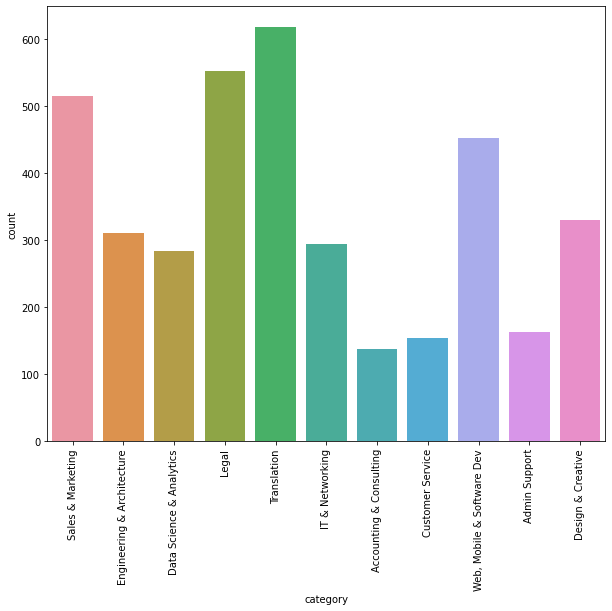

In [150]:
plt.figure(figsize=(10,8))
sns.countplot(df['category'])
plt.xticks(rotation=90)
plt.show()

The dataset is balanced

`hourly_price` boxplot for every `category`:

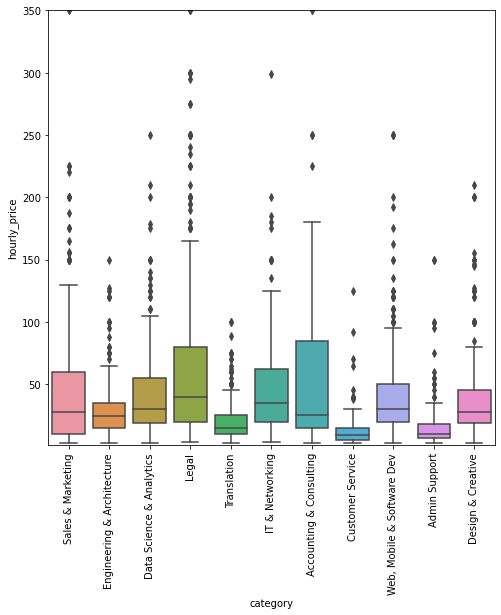

In [151]:
plt.figure(figsize=(8,8))
sns.boxplot(x = 'category', y='hourly_price', data=df)
plt.ylim(1,350)
plt.xticks(rotation=90)
plt.show()

#### freelancers per Country : 

<AxesSubplot:ylabel='country'>

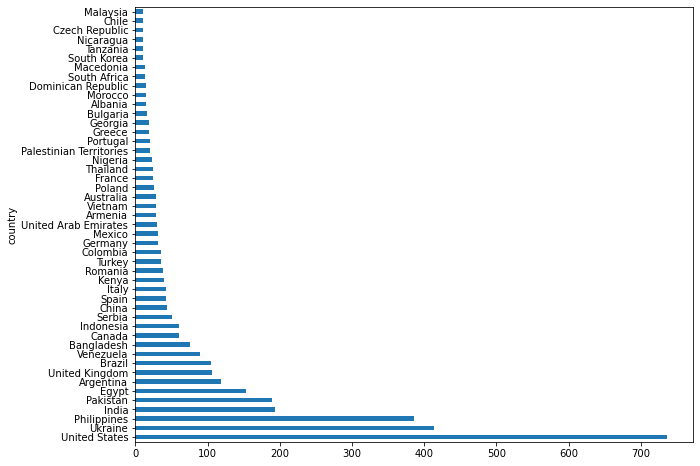

In [152]:
#### Number of freelancers per country :
countries = df.groupby(df["country"])["country"].count()
countries_most = countries[countries > 10].sort_values(ascending=False)
countries_most.plot(kind="barh", figsize= (10, 8))
